<a href="https://colab.research.google.com/github/nidhipriya2000/ted_talks_views_pred_by_nidhi/blob/main/tedtalks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#MACHINE LEARNING REGRESSION PROJECT
#TED TALK VIEWS PREDICTION








**PROBLEM STATEMENT:**
*Understanding and analyzing the factors leading to popularity of ted talk videos and hence building a model to predict the views of an uploaded video* *italicised text* 

Let's get started!!!!

In [ ]:
#Importing all the relevant libraries

import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.neural_network import MLPRegressor
import xgboost as xgb
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn import metrics
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

#for the graph aesthetics
sns.set_style('dark')
matplotlib.rcParams['font.size'] = 15
matplotlib.rcParams['figure.figsize'] = (10,5)
matplotlib.rcParams['figure.facecolor'] = 'FFEFDB'

In [ ]:
#importing datetime
from datetime import datetime
import calendar
 
today = datetime.now()
today.strftime('%Y-%m-%d')

'2022-05-13'

In [ ]:
#importing ml libraries

!pip install scikit-optimize
!pip install catboost
import sklearn
from sklearn.model_selection import ShuffleSplit , StratifiedKFold , RepeatedStratifiedKFold ,train_test_split
from sklearn.model_selection import cross_val_score , cross_validate ,cross_val_predict
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import confusion_matrix as confmat
from sklearn.metrics import precision_recall_curve , classification_report
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

     |████████████████████████████████| 100 kB 7.3 MB/s 
     |████████████████████████████████| 76.6 MB 1.3 MB/s 


In [ ]:
#mounting drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading file

df=pd.read_csv('/content/drive/MyDrive/Copy of data_ted_talks.csv')

In [ ]:
#making a copy of the dataset so that it doesn't impact the original data
ted_df=df.copy()

In [ ]:
#lets have a look on our data and spend some time in understanding the relevance of different labels
ted_df.head()

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac..."
2,7,Simplicity sells,David Pogue,{0: 'David Pogue'},{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,2006-02-24,2006-06-27,TED2006,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",124.0,1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",https://www.ted.com/talks/david_pogue_simplici...,New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,53,Greening the ghetto,Majora Carter,{0: 'Majora Carter'},{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,2006-02-26,2006-06-27,TED2006,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",219.0,1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,https://www.ted.com/talks/majora_carter_greeni...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...
4,66,Do schools kill creativity?,Sir Ken Robinson,{0: 'Sir Ken Robinson'},"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,2006-02-25,2006-06-27,TED2006,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",4931.0,1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",https://www.ted.com/talks/sir_ken_robinson_do_...,Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...


In [ ]:
#dimensions of data
ted_df.shape

(4005, 19)

#1. DATA CLEANING

In [ ]:
#Lets have a look on the columns with null values
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
ted_df.describe(include='all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,Averting the climate crisis,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre..."
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
#following columns have null values and hence are required to be treated

ted_df['occupations'].fillna('N/A',inplace=True)
ted_df['about_speakers'].fillna('N/A',inplace=True)
ted_df['all_speakers'].fillna('N/A',inplace=True)
ted_df['total_languages'] = ted_df['available_lang'].apply(lambda x: len(x))


In [ ]:
#done with the task
ted_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   talk_id          4005 non-null   int64  
 1   title            4005 non-null   object 
 2   speaker_1        4005 non-null   object 
 3   all_speakers     4005 non-null   object 
 4   occupations      4005 non-null   object 
 5   about_speakers   4005 non-null   object 
 6   views            4005 non-null   int64  
 7   recorded_date    4004 non-null   object 
 8   published_date   4005 non-null   object 
 9   event            4005 non-null   object 
 10  native_lang      4005 non-null   object 
 11  available_lang   4005 non-null   object 
 12  comments         3350 non-null   float64
 13  duration         4005 non-null   int64  
 14  topics           4005 non-null   object 
 15  related_talks    4005 non-null   object 
 16  url              4005 non-null   object 
 17  description   

# Outliers treatment

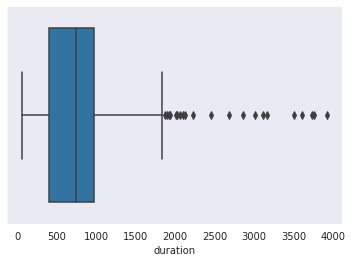

In [ ]:
#checking for outliers in duration
sns.boxplot(ted_df['duration'], data= ted_df)

In [ ]:
#treating outliers
ted_df_duration_iqr=  ted_df['duration'].quantile(0.75)-ted_df['duration'].quantile(0.25)
ted_df['duration']= ted_df['duration'].mask(ted_df['duration']>(ted_df['duration'].quantile(0.75)+1.5*ted_df_duration_iqr), ted_df['duration'].mean())

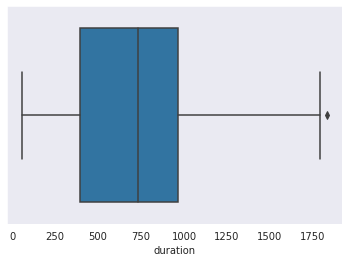

In [ ]:
#and done
sns.boxplot(ted_df['duration'], data= ted_df)

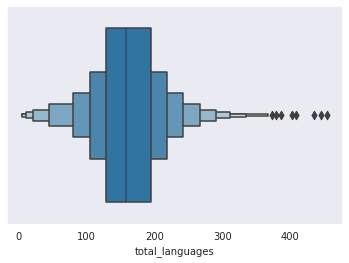

In [ ]:
#checking for outliers in languages
sns.boxenplot(ted_df['total_languages'], data= ted_df)

In [ ]:
#treating outliers
total_languages_iqr= (ted_df['total_languages'].quantile(0.75))-(ted_df['total_languages'].quantile(0.25))
ted_df['total_languages']= ted_df['total_languages'].mask(ted_df['total_languages']>(ted_df['total_languages'].quantile(0.75)+1.5*total_languages_iqr),ted_df['total_languages'].mean())

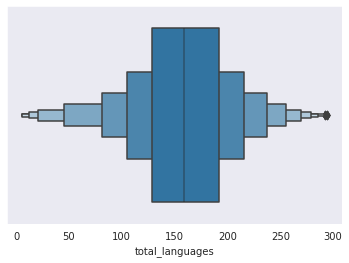

In [ ]:
#and we're done
sns.boxenplot(ted_df['total_languages'], data= ted_df)

#2.Have a look on the numerical data

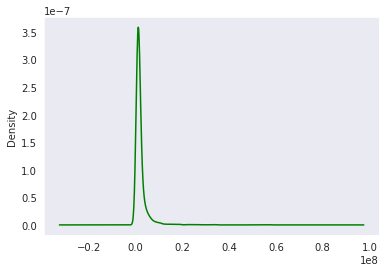

In [ ]:
#density plot of views

ted_df.views.plot.density(color='green')
plt.show()

the graph shows that 'views' is positively skewed

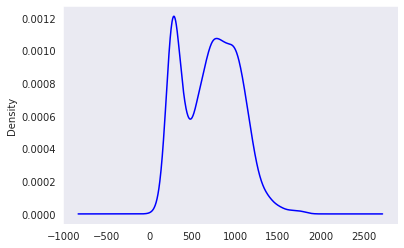

In [ ]:
#density plot of duration

ted_df.duration.plot.density(color='blue')
plt.show()

#3.Data preprocessing

In [ ]:
ted_df['recorded_date']= pd.to_datetime(ted_df['recorded_date'])
ted_df['published_date']= pd.to_datetime(ted_df['published_date'])
last_publishing_date = ted_df['published_date'].max()

ted_df['time_since_published'] = last_publishing_date - pd.DatetimeIndex(ted_df['published_date'])

In [ ]:
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
days_order   = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [ ]:
import datetime
ted_df['month'] = pd.DatetimeIndex(ted_df['published_date']).month
ted_df['month'] = ted_df['month'].apply(lambda x: calendar.month_abbr[x])
ted_df['year'] = pd.DatetimeIndex(ted_df['published_date']).year
ted_df['day'] = pd.DatetimeIndex(ted_df['published_date']).day
ted_df['week_day']= ted_df['published_date'].apply(lambda x: days_order[datetime.date(x.year, x.month, x.day).weekday()])

In [ ]:
ted_df['daily_views'] = ted_df['views'] / ( ted_df['time_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
categorical_data= ted_df[['title', 'speaker_1', 'all_speakers', 'occupations', 'about_speakers', 'native_lang', 'available_lang', 'comments', 'topics', 'related_talks', 'url', 'description', 'transcript']] 
data_numerical= ted_df[['talk_id','views', 'duration']]
data_target_variable= ted_df[['views']]
#here we introduced our target variable

#4.Exploratory data analysis

## Plotting features vs target variable for better understanding

Speaker_1 vs daily views

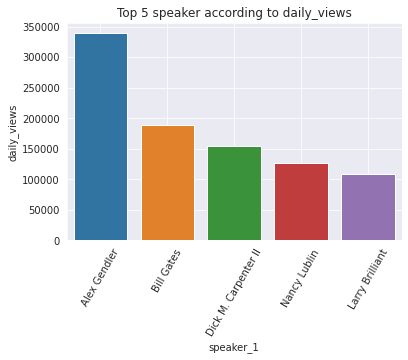

In [ ]:
temp=ted_df.groupby(['speaker_1'],as_index=False)['daily_views'].sum().sort_values('daily_views',ascending=False)[:5]
ax=sns.barplot(x='speaker_1', y='daily_views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=60);
plt.title('Top 5 speaker according to daily_views')
ax.grid(True)

speaker_1 vs talks delivered

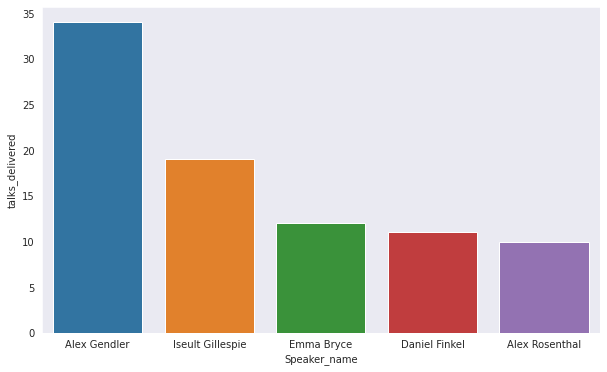

In [ ]:
#speakers who have delivered most number of talks

speaker_count = ted_df['speaker_1'].value_counts().to_frame()
data_speaker_count = pd.DataFrame(speaker_count)
data_speaker_count = data_speaker_count.reset_index()
data_speaker_count.columns = ['Speaker_name', 'talks_delivered']
most_talks = data_speaker_count.nlargest(5, 'talks_delivered')
plt.figure(figsize=(10,6))
plt.setp(ax.get_xticklabels(), rotation=50);
sns.barplot(x = 'Speaker_name', y = 'talks_delivered', data = most_talks)

speaker_1 vs duration

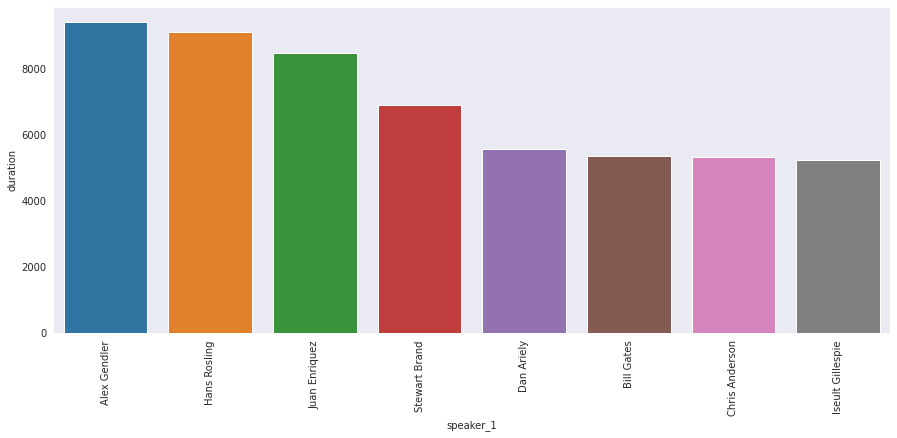

In [ ]:
#speakers who have delivered longest talks

temp=ted_df.groupby(['speaker_1'],as_index=False)['duration'].sum().sort_values('duration',ascending=False)[:25]
temp=ted_df.groupby(['speaker_1'],as_index=False).agg({'duration':'sum','talk_id':'count'}).sort_values('duration',ascending=False).reset_index()[:8]
temp['talk_id']=temp['duration']/temp['talk_id']
plt.figure(figsize=(15,6))
ax=sns.barplot(x='speaker_1',y='duration',data=temp)
labels=ax.get_xticklabels()
plt.setp(labels, rotation=90);


speaker_1 vs comments

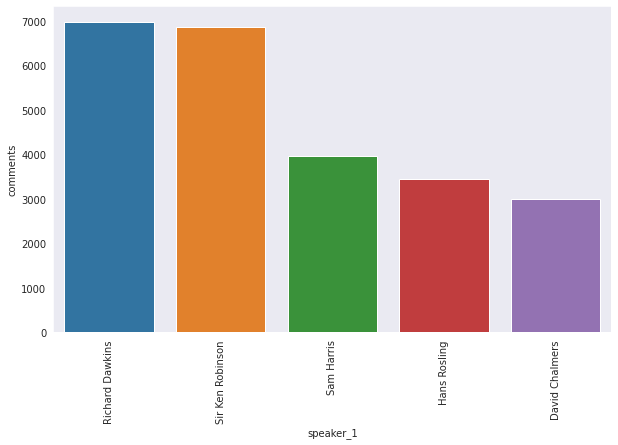

In [ ]:
#speakers who received most comments on their videos
temp=ted_df.groupby(['speaker_1'],as_index=False)['comments'].sum().sort_values('comments',ascending=False)[:5]
plt.figure(figsize=(10,6))
ax=sns.barplot(x='speaker_1',y='comments',data=temp);
plt.setp(ax.get_xticklabels(), rotation=90);

speaker vs avg views

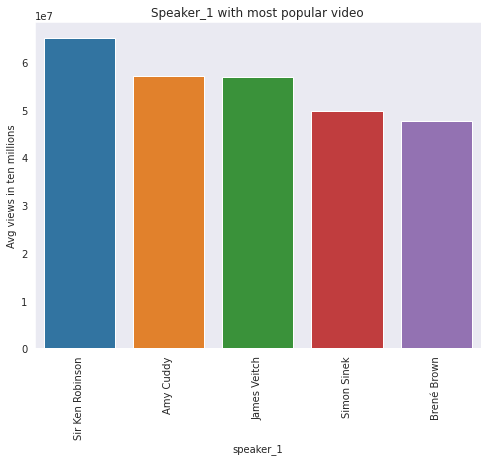

In [ ]:
#to find most popular video in terms of views
temp=ted_df[['speaker_1','views']].sort_values('views',ascending=False)[:5]
plt.figure(figsize=(8,6))
ax=sns.barplot(x='speaker_1',y='views',data=temp)
plt.setp(ax.get_xticklabels(), rotation=90);
plt.title('Speaker_1 with most popular video')
plt.ylabel('Avg views in ten millions')
ax.grid(False)

speaker_1 vs daily views

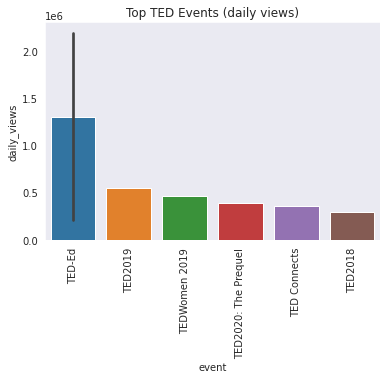

In [ ]:

temp=ted_df.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events (daily views)')
plt.setp(labels, rotation=90);

speaker_1 vs avg daily views

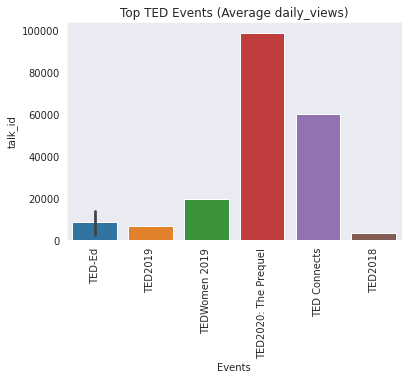

In [ ]:
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events (Average daily_views)')
plt.xlabel('Events')
plt.setp(labels, rotation=90);

In [ ]:
event=ted_df.groupby('event').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
event=event.to_dict()
event=event.values()
event=  list(event)[0]
ted_df['event_wise_avg_views']=ted_df['event'].map(event)

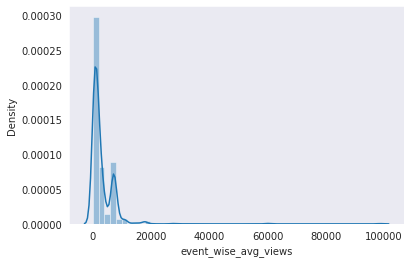

In [ ]:
sns.distplot(ted_df['event_wise_avg_views'])

Event vs daily views in millions

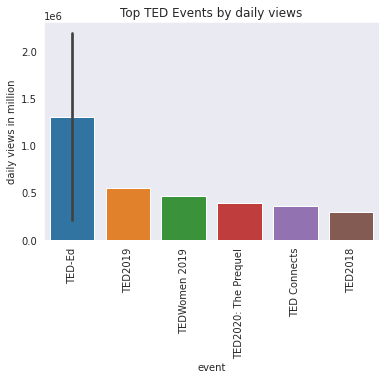

In [ ]:
temp=ted_df.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
temp['talk_id']=temp['daily_views']/temp['talk_id']
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.title('Top TED Events by daily views')
plt.ylabel('daily views in million')
plt.setp(labels, rotation=90);


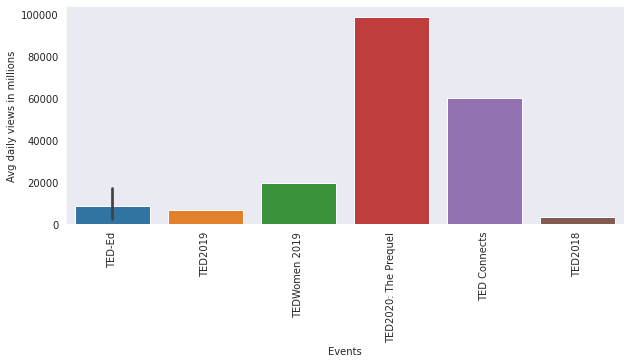

In [ ]:
plt.figure(figsize=(10,4))
ax=sns.barplot(x='event',y='talk_id',data=temp)
labels=ax.get_xticklabels()
plt.xlabel('Events')
plt.ylabel('Avg daily views in millions')
plt.setp(labels, rotation=90);

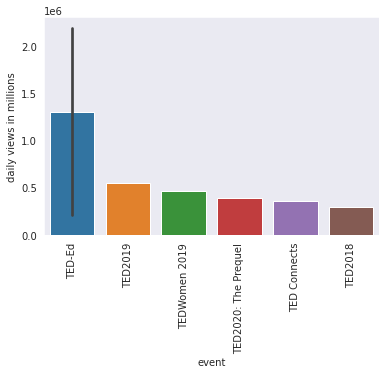

In [ ]:
temp=ted_df.groupby(['event','year'],as_index=False).agg({'daily_views':'sum','talk_id':'count'}).sort_values('daily_views',ascending=False).reset_index()[:8]
ax=sns.barplot(x='event',y='daily_views',data=temp)
labels=ax.get_xticklabels()
plt.ylabel('daily views in millions')
plt.setp(labels, rotation=90);

In [ ]:
#Defining some more relevant variables

In [ ]:
unique_topics=[]
for i in range(0,len(ted_df)):
  temp=ted_df['topics'][i]
  for i in temp:
    if(i not in unique_topics):
      unique_topics.append(i)
      
len(unique_topics)

57

In [ ]:
unique_topics_avg_view_dict={}
for topic in unique_topics:
  temp=0
  count=0
  for i in range(0,len(ted_df)):
    temp2=ted_df['topics'][i]
    if(topic in temp2):
      temp+=ted_df['daily_views'][i]
      count+=1
  unique_topics_avg_view_dict[topic]=temp//count

In [ ]:
topics_wise_avg_views=[]
for i in range(0,len(ted_df)):
  temp=0
  temp_topic=ted_df['topics'][i]
  for el in temp_topic:
    temp+=unique_topics_avg_view_dict[el]
  
  topics_wise_avg_views.append(temp//len(temp_topic))

se = pd.Series(topics_wise_avg_views)
ted_df['topics_wise_avg_views'] = se.values

In [ ]:
ted_df['num_of_topics'] = ted_df.apply(lambda x: len(x['topics']), axis=1)

In [ ]:
speaker=ted_df.groupby('speaker_1').agg({'daily_views' : 'mean'}).sort_values(['daily_views'],ascending=False)
speaker=speaker.to_dict()
speaker=speaker.values()
speaker=  list(speaker)[0]
ted_df['speaker_1_avg_views']=ted_df['speaker_1'].map(speaker)

# 5.CHECKING THE CORRELATION BETWEEN THE VARIABLES

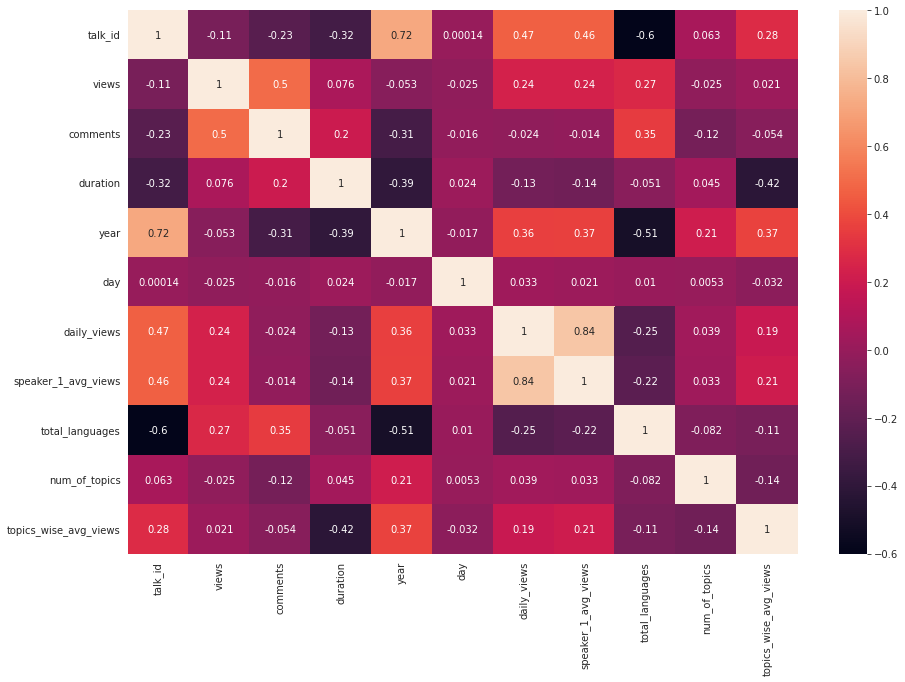

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot= True,ax=ax)

#6. Data prepration and feature engineering

REMOVING IRRELEVENT COLUMNS

In [ ]:
ted_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'total_languages',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'event_wise_avg_views', 'topics_wise_avg_views',
       'num_of_topics', 'speaker_1_avg_views'],
      dtype='object')

In [ ]:
columns_to_keep=['comments', 'duration', 'total_languages', 'time_since_published', 'month',
       'year', 'day', 'week_day', 'daily_views', 'event_wise_avg_views',
       'num_of_topics', 'speaker_1_avg_views']

In [ ]:
df=ted_df[columns_to_keep].copy()

separating dependent and independent variables

In [ ]:
y=df['daily_views']
X=df.drop(columns='daily_views')

In [ ]:
X2=X

In [ ]:
X.columns

Index(['comments', 'duration', 'total_languages', 'time_since_published',
       'month', 'year', 'day', 'week_day', 'event_wise_avg_views',
       'num_of_topics', 'speaker_1_avg_views'],
      dtype='object')

In [ ]:
X=pd.get_dummies(X)
X.shape

(4005, 28)

In [ ]:
X.head()

,comments,duration,total_languages,time_since_published,year,day,event_wise_avg_views,num_of_topics,speaker_1_avg_views,month_Apr,...,month_Nov,month_Oct,month_Sep,week_day_Fri,week_day_Mon,week_day_Sat,week_day_Sun,week_day_Thu,week_day_Tue,week_day_Wed
0,272.0,977.0,270.000000,5056 days,2006,27,782.72889,134,699.725014,0,...,0,0,0,0,0,0,0,0,1,0
1,628.0,1190.0,160.720599,5056 days,2006,27,782.72889,138,1098.925286,0,...,0,0,0,0,0,0,0,0,1,0
2,124.0,1286.0,165.000000,5056 days,2006,27,782.72889,123,687.917181,0,...,0,0,0,0,0,0,0,0,1,0
3,219.0,1116.0,219.000000,5056 days,2006,27,782.72889,116,452.806229,0,...,0,0,0,0,0,0,0,0,1,0
4,4931.0,1164.0,160.720599,5056 days,2006,27,782.72889,84,6453.203121,0,...,0,0,0,0,0,0,0,0,1,0


#using knn imputer for treating NaN values

In [ ]:
print(ted_df[['comments']].isnull().sum())

comments    655
dtype: int64


In [ ]:
outlier_data=['duration','comments','speaker_1_avg_views','event_wise_avg_views']

In [ ]:
scaler = MinMaxScaler()

from sklearn.impute import KNNImputer
# defining imputer
imputer = KNNImputer()
#fitting the model
imputer.fit(scaler.fit_transform(ted_df[outlier_data]))
# transforming the dataset
ted_df[outlier_data] = imputer.transform(scaler.fit_transform(ted_df[outlier_data]))
#again applying inverse_transform on the data
ted_df[outlier_data] = scaler.inverse_transform(ted_df[outlier_data])


In [ ]:
#and we're done
print(ted_df[['comments']].isnull().sum())

comments    0
dtype: int64


#7.FITTING ML MODELS

#XGB BOOST

In [ ]:
xgb_model= xgb.XGBRegressor(objective="reg:squarederror")

In [ ]:
ted_df.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript', 'total_languages',
       'time_since_published', 'month', 'year', 'day', 'week_day',
       'daily_views', 'event_wise_avg_views', 'topics_wise_avg_views',
       'num_of_topics', 'speaker_1_avg_views'],
      dtype='object')

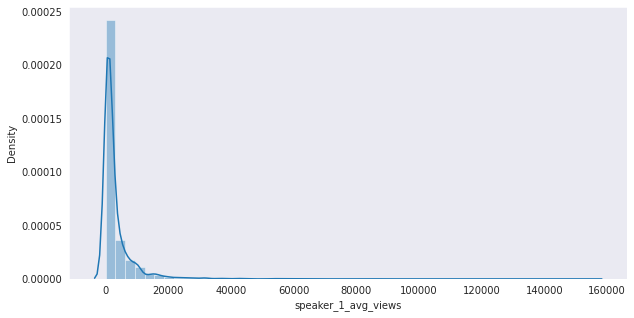

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(ted_df['speaker_1_avg_views'])

In [ ]:
X= ted_df[['duration',
       'speaker_1_avg_views', 'event_wise_avg_views',
       'total_languages', 'num_of_topics', 'topics_wise_avg_views', 'year', 'day']]

In [ ]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()

In [ ]:
X= Scaler.fit_transform(X)
y= Scaler.fit_transform(ted_df['daily_views'].values.reshape(-1,1))

In [ ]:
X.shape

(4005, 8)

In [ ]:
y.shape

(4005, 1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [ ]:
xgb_model.fit(X_train,y_train)

XGBRegressor(objective='reg:squarederror')

In [ ]:
xgb_r2_train=xgb_model.score(X_train, y_train)
xgb_r2_train

0.9444831102962925

In [ ]:
xgb_r2_test= xgb_model.score(X_test, y_test)
xgb_r2_test

0.8164359302462112

In [ ]:
xgb_y_train_pred= xgb_model.predict(X_train)
xgb_y_test_pred= xgb_model.predict(X_test)

In [ ]:
mean_absolute_error(y_train,xgb_y_train_pred)

0.08581679426947134

In [ ]:
mean_absolute_error(y_test, xgb_y_test_pred)

0.11684206618478195

In [ ]:
xgb_rmse_train = math.sqrt(mean_squared_error(y_train,xgb_y_train_pred))
xgb_rmse_train

0.24241228334952034

In [ ]:
xgb_rmse_test = math.sqrt(mean_squared_error(y_test,xgb_y_test_pred))
xgb_rmse_test

0.37469330114200744

<Figure size 720x288 with 0 Axes>

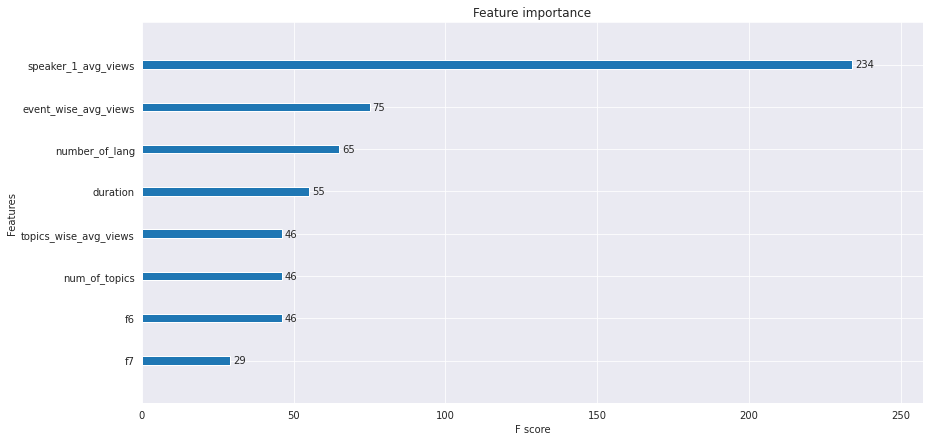

In [ ]:
#Plotting feature importance
xgb_model.get_booster().feature_names = ['duration', 'speaker_1_avg_views', 'event_wise_avg_views','number_of_lang', 'num_of_topics', 'topics_wise_avg_views']
plt.rcParams["figure.figsize"] = (14,7)
plt.figure(figsize= (10,4))
xgb.plot_importance(xgb_model.get_booster())

<Figure size 720x288 with 0 Axes>

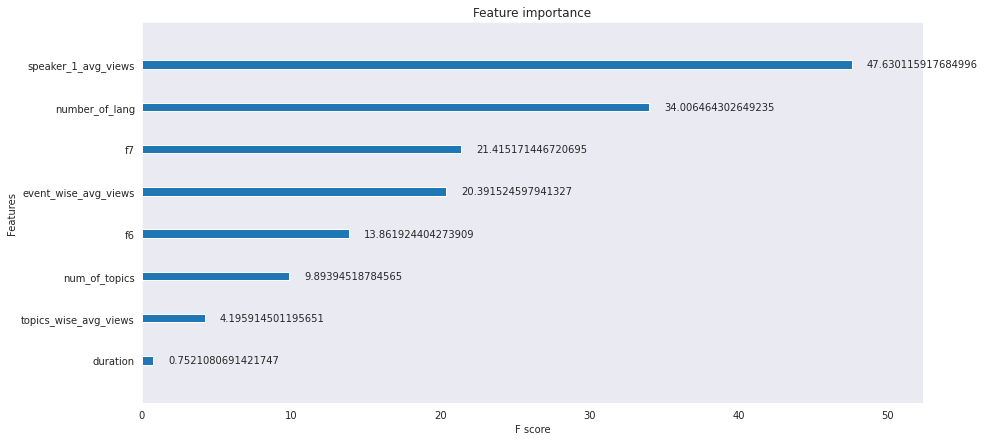

In [ ]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (14,7)
plt.figure(figsize= (10,4))
plot_importance(xgb_model, importance_type = 'gain', grid= False)

# CAT BOOST

In [ ]:
from catboost import CatBoostRegressor

In [ ]:
model = CatBoostRegressor(iterations=50,
                          learning_rate=0.6,
                          depth=10)
model.fit(X_train, y_train)

0:	learn: 0.7323311	total: 117ms	remaining: 5.71s
1:	learn: 0.5460016	total: 184ms	remaining: 4.41s
2:	learn: 0.4457682	total: 231ms	remaining: 3.62s
3:	learn: 0.3984428	total: 283ms	remaining: 3.25s
4:	learn: 0.3530052	total: 332ms	remaining: 2.98s
5:	learn: 0.3122030	total: 366ms	remaining: 2.68s
6:	learn: 0.2971298	total: 406ms	remaining: 2.5s
7:	learn: 0.2809427	total: 442ms	remaining: 2.32s
8:	learn: 0.2679726	total: 481ms	remaining: 2.19s
9:	learn: 0.2470372	total: 524ms	remaining: 2.1s
10:	learn: 0.2391988	total: 565ms	remaining: 2s
11:	learn: 0.2242531	total: 603ms	remaining: 1.91s
12:	learn: 0.2098122	total: 644ms	remaining: 1.83s
13:	learn: 0.2006082	total: 690ms	remaining: 1.77s
14:	learn: 0.1975668	total: 728ms	remaining: 1.7s
15:	learn: 0.1833296	total: 778ms	remaining: 1.65s
16:	learn: 0.1735467	total: 832ms	remaining: 1.61s
17:	learn: 0.1653679	total: 886ms	remaining: 1.57s
18:	learn: 0.1618159	total: 933ms	remaining: 1.52s
19:	learn: 0.1543028	total: 982ms	remaining: 1.

In [ ]:
cat_y_train_pred= model.predict(X_train)
cat_y_test_pred= model.predict(X_test)

In [ ]:
cat_boost_r2_test = r2_score(y_test,cat_y_test_pred)
cat_boost_r2_test

0.7770890425340256

In [ ]:
cat_boost_r2_train=r2_score(y_train, cat_y_train_pred)
cat_boost_r2_train

0.9957934507944981

In [ ]:
mean_absolute_error(y_train,cat_y_train_pred)

0.041191072525756656

In [ ]:
mean_absolute_error(y_test, cat_y_test_pred)

0.13850799112501447

In [ ]:
cat_rmse_train = math.sqrt(mean_squared_error(y_train,cat_y_train_pred))
cat_rmse_train

0.06672752942587849

In [ ]:
cat_rmse_test = math.sqrt(mean_squared_error(y_test,cat_y_test_pred))
cat_rmse_test

0.41290277200698083

In [ ]:
X=pd.DataFrame(X)

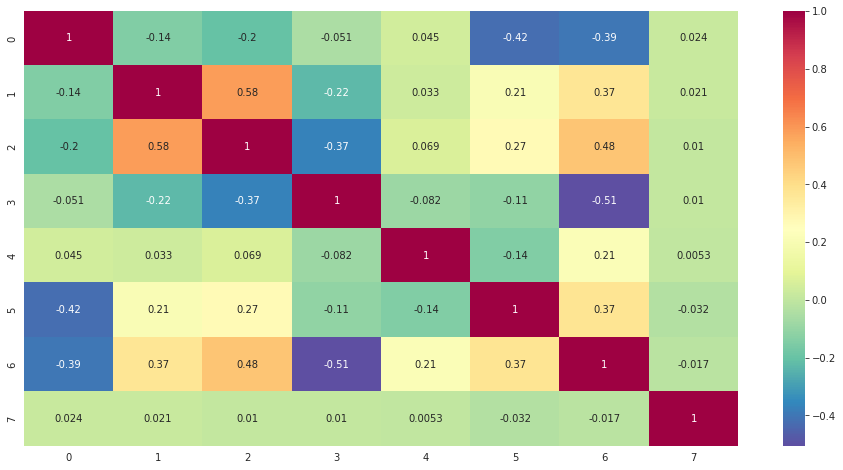

In [ ]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
sns.heatmap(X.corr(),annot=True, cmap='Spectral_r')

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [ ]:
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
MSE  = mean_squared_error(y_test, y_test_pred)
print("MSE on test:" , MSE)
RMSE = np.sqrt(MSE)
print("RMSE on test:" ,RMSE)
y_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)
print('Training MAE: {:0.2f}'.format(mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(mean_absolute_error(y_test, y_test_pred)))

MSE on test: 0.16396510776233705
RMSE on test: 0.40492605221489153
Training MAE: 0.16
Test MAE: 0.14


# Random forest

In [ ]:
rf = RandomForestRegressor(criterion='mae')
rf.fit(X_train, y_train)
y_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))
print('Target mean: {:0.2f}'.format(y.mean()))
print('Target std: {:0.2f}'.format(y.std()))

Training MAE: 0.05
Test MAE: 0.12
Target mean: 0.00
Target std: 1.00


In [ ]:
#now applying feature selection and hyper parameter tuning as the score is not good enough

In [ ]:
n_estimators = [30,50,80,100,120,150]
max_depth = [4,6,8,10,12]
min_samples_split = [50,80,100,150,200]
min_samples_leaf = [10,30,40,50,60,80]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

#  Hyperparameter Tuning using Randomized Search CV


In [ ]:
rf_model = RandomForestRegressor(criterion='mae')

#RandomSearch
rf_random = RandomizedSearchCV(rf_model,param_dict,verbose=0,cv=5)
rf_random.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8, 10, 12],
                                        'min_samples_leaf': [10, 30, 40, 50, 60,
                                                             80],
                                        'min_samples_split': [50, 80, 100, 150,
                                                              200],
                                        'n_estimators': [30, 50, 80, 100, 120,
                                                         150]})

In [ ]:
rf_optimal_model = rf_random.best_estimator_

In [ ]:
rf_optimal_model

RandomForestRegressor(criterion='mae', max_depth=12, min_samples_leaf=30,
                      min_samples_split=50, n_estimators=50)

In [ ]:
y_pred = rf_optimal_model.predict(X_train)
y_test_pred = rf_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.13
Test MAE: 0.11


In [ ]:
y_hat = rf_optimal_model.predict(X_test)
print(f'r_sqr value for train: {rf_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculating Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for RFforest is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.5778461404297027
For test set the R_Squared for RFforest is 0.4724960688483665 and adjusted R_Squared is 0.471440004922137


Let's plot all the scores of rf_optimal_model together.

In [ ]:
model =[
        ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)]
      ]
#Let's run the the model and store the results in one dataframe
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_rf = pd.DataFrame(model_data)

#printing the results_df_rf
results_df_rf

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,RandomForest,0.128976,0.112585,0.573297,0.469677,0.66668,0.691072


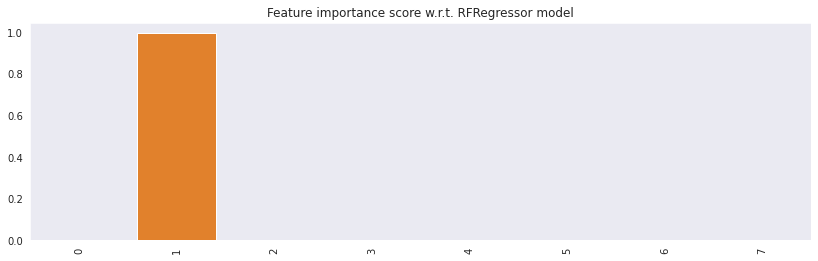

In [ ]:
importances= rf_optimal_model.feature_importances_
Features=list(X_train.columns)
importance_dict = {'Features': list(X_train.columns), 'Feature Importances': importances}
importances_df= pd.DataFrame(importance_dict)    

fig = plt.figure(figsize=(14, 4))
sns.barplot( Features, importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. RFRegressor model')
plt.show()

Applying XGboost regressor model

In [ ]:
#XGBoost Regressor

n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
from xgboost import XGBRegressor
# Create an instance of the XGBoost
xgb_model = XGBRegressor(learning_rate=0.1)
#RandomSearch
xgb_random = RandomizedSearchCV(xgb_model,param_dict,verbose=2,cv=5)
xgb_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[17:10:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[17:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[17:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[17:10:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=8, min_samples_leaf=50, min_samples_split=150, n_estimators=50; total time=   0.2s
[17:10:13] WARNING: /wo

RandomizedSearchCV(cv=5, estimator=XGBRegressor(),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
xgb_optimal_model = xgb_random.best_estimator_

In [ ]:
y_hat = xgb_optimal_model.predict(X_test)
print(f'r_sqr value for train: {xgb_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test set the R_Squared for XGBoost is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.9796660746192981
For test set the R_Squared for XGBoost is 0.7968895394794676 and adjusted R_Squared is 0.796482911930878


In [ ]:
y_pred = xgb_optimal_model.predict(X_train)
y_test_pred = xgb_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.06
Test MAE: 0.10


Let's plot all the scores of xgb_optimal_model together.

In [ ]:
model = [
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]         
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_xgb = pd.DataFrame(model_data)
#printing the results_df_xgb
results_df_xgb

[17:10:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,XGBRegressor:,0.07317,0.110402,0.970118,0.788203,0.176424,0.43673


**Let's plot the feature importance score w.r.t. XGBregressor model**

In [ ]:
importances=xgb_optimal_model.feature_importances_
Features=list(X_train.columns)
importances = pd.DataFrame({'Features': list(X_train.columns), 'Importances': importances})
importances_df=pd.DataFrame(importance_dict)    

fig = plt.figure(figsize=(14, 4))
sns.barplot(Features, importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. XGBregressor model')
plt.show()

ValueError: ignored

<Figure size 1008x288 with 0 Axes>

EXTRA TREE REGRESSOR

In [ ]:
et = ExtraTreesRegressor(criterion='mae', max_depth=30, n_estimators=200, min_samples_leaf=2, min_samples_split=6)
et.fit(X_train, y_train)
y_pred = et.predict(X_train)
y_test_pred = et.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.06
Test MAE: 0.09


Hyperparameter Tuning using Randomized Search CV

In [ ]:
n_estimators = [50,80,100]
# Maximum depth of trees
max_depth = [4,6,8]
# Minimum number of samples required to split a node
min_samples_split = [50,100,150]
# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]
# HYperparameter Dict
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [ ]:
et_model = ExtraTreesRegressor(criterion='mae')

#RandomSearch
et_random = RandomizedSearchCV(et_model,param_dict,verbose=2,cv=5)
et_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   3.9s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   5.4s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   7.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   8.2s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   6.8s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.5s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   3.6s
[CV] END max_depth=8, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   2.4s
[CV] END max_depth=8, min_

RandomizedSearchCV(cv=5, estimator=ExtraTreesRegressor(criterion='mae'),
                   param_distributions={'max_depth': [4, 6, 8],
                                        'min_samples_leaf': [40, 50],
                                        'min_samples_split': [50, 100, 150],
                                        'n_estimators': [50, 80, 100]},
                   verbose=2)

In [ ]:
et_optimal_model = et_random.best_estimator_

In [ ]:
y_pred = et_optimal_model.predict(X_train)
y_test_pred = et_optimal_model.predict(X_test)
print('Training MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_train, y_pred)))
print('Test MAE: {:0.2f}'.format(metrics.mean_absolute_error(y_test, y_test_pred)))

Training MAE: 0.17
Test MAE: 0.15


In [ ]:
y_hat = et_optimal_model.predict(X_test)
print(f'r_sqr value for train: {et_optimal_model.score(X_train, y_train)}')
r_squared= r2_score(y_test,y_hat)
#Calculate Adjusted R-sqaured
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
print(f'For test the R_Squared for ExtraTreesRegressor is {r_squared} and adjusted R_Squared is {adjusted_r_squared}')

r_sqr value for train: 0.4633178109206638
For test the R_Squared for ExtraTreesRegressor is 0.3988931045851889 and adjusted R_Squared is 0.39768968737715127


In [ ]:
model = [
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
         ]
#Let's run the the model
model_data = []
for name,curr_model in model :
    curr_model_data = {}
    curr_model.random_state = 42
    curr_model_data["Model_Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

results_df_et = pd.DataFrame(model_data)
#printing the results_df_et
results_df_et

,Model_Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,ExtraTreeRegressor :,0.182935,0.161403,0.461842,0.396458,0.748703,0.737236


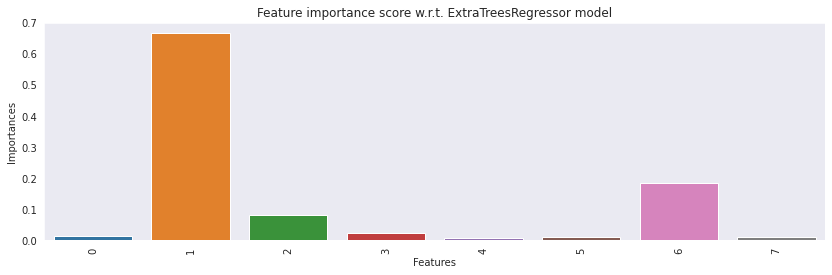

In [ ]:
importances = pd.DataFrame({'Features': X.columns, 
                                'Importances': et.feature_importances_})
    
importances.sort_values(by=['Importances'], axis='index', ascending=False, inplace=True)
fig = plt.figure(figsize=(14, 4))
sns.barplot(x='Features', y='Importances', data=importances)
plt.xticks(rotation='vertical')
plt.title('Feature importance score w.r.t. ExtraTreesRegressor model')
plt.show()

#8. Comparison of different regressor Models
The ML regressor models that we have used are as follows:

In [ ]:
models = [ ['LinearRegressor', LinearRegression()],
           ['KNeighborsRegressor: ',  neighbors.KNeighborsRegressor()],
           ['RandomForest ',RandomForestRegressor(criterion='mae',max_depth=6,min_samples_leaf=30,min_samples_split=80,n_estimators=150,random_state=42)],
           ['ExtraTreeRegressor :',ExtraTreesRegressor(criterion='mae',max_depth=6, min_samples_leaf=40,min_samples_split=100, n_estimators=50)],
           ['GradientBoostingRegressor: ', GradientBoostingRegressor()] ,
           ['XGBRegressor: ', xgb.XGBRegressor(base_score=0.5, booster='gbtree',colsample_bytree=1, gamma=0,importance_type='gain', learning_rate=0.1,max_depth=4, min_samples_leaf=40,
             min_samples_split=150, n_estimators=80)]    ]      


In [ ]:
model_data = []
for name,curr_model in models :
    curr_model_data = {}
    curr_model.random_state = 78
    curr_model_data["Name"] = name
    curr_model.fit(X_train,y_train)
    curr_model_data["MAE_train"] =metrics.mean_absolute_error(y_train, curr_model.predict(X_train))
    curr_model_data["MAE_test"] =metrics.mean_absolute_error(y_test, curr_model.predict(X_test))
    curr_model_data["R2_Score_train"] = r2_score(y_train,curr_model.predict(X_train))
    curr_model_data["R2_Score_test"] = r2_score(y_test,curr_model.predict(X_test))
    curr_model_data["RMSE_Score_train"] = np.sqrt(mean_squared_error(y_train,curr_model.predict(X_train)))
    curr_model_data["RMSE_Score_test"] = np.sqrt(mean_squared_error(y_test,curr_model.predict(X_test)))
    model_data.append(curr_model_data)

[18:04:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results_df = pd.DataFrame(model_data)
results_df

,Name,MAE_train,MAE_test,R2_Score_train,R2_Score_test,RMSE_Score_train,RMSE_Score_test
0,LinearRegressor,0.162784,0.143068,0.752904,0.817927,0.507326,0.404926
1,KNeighborsRegressor:,0.131815,0.146847,0.818062,0.743068,0.435328,0.481018
2,RandomForest,0.128628,0.112125,0.569872,0.467747,0.669351,0.692328
3,ExtraTreeRegressor :,0.174410,0.153675,0.467199,0.403226,0.744968,0.733091
4,GradientBoostingRegressor:,0.079822,0.109524,0.961267,0.782633,0.200860,0.442435
5,XGBRegressor:,0.073170,0.110402,0.970118,0.788203,0.176424,0.436730


In [ ]:
results_df_xgb

In [ ]:
print(f'Mean value of our target variable is {y.mean()}')

#9. conclusion
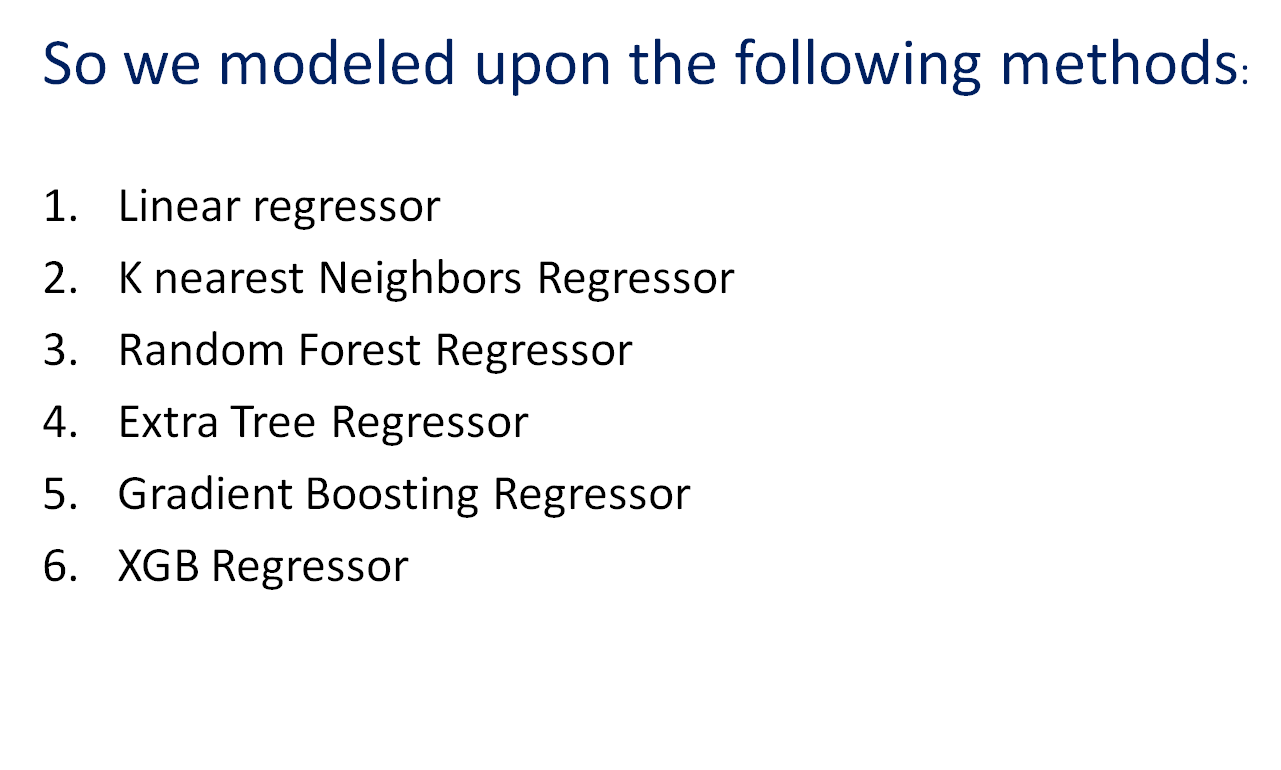

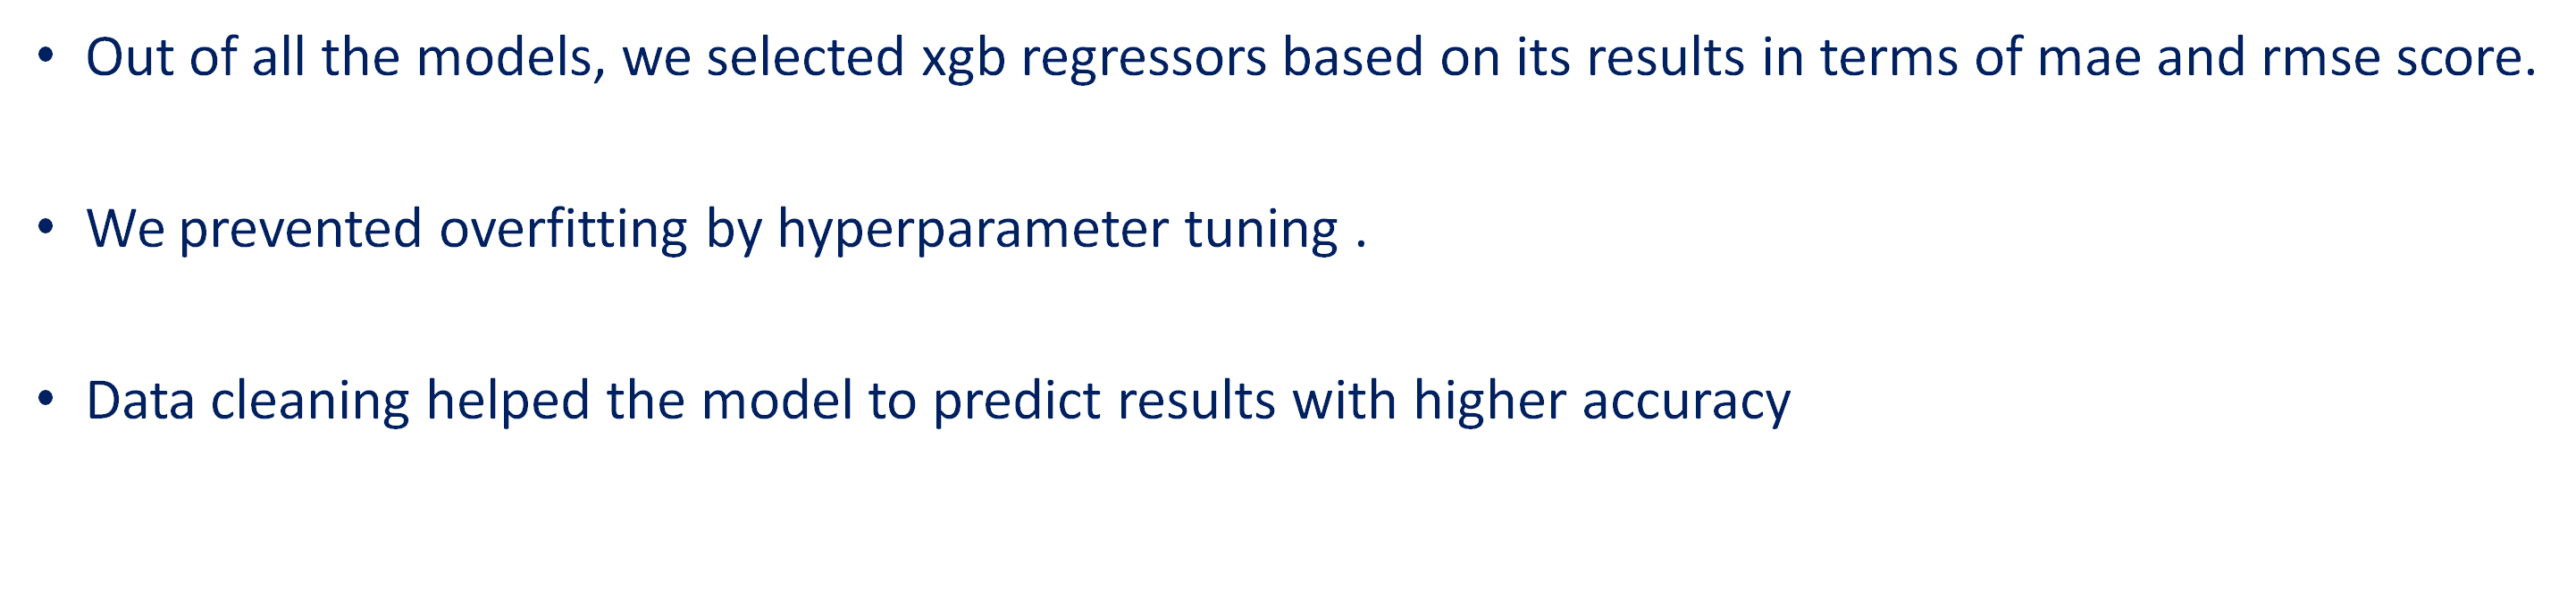